# Import Libraries

In [1]:
# Remove Warnings from output
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# importing Basic Libraries
%matplotlib inline

# Setting Plotting Style
sns.set_style('darkgrid')

# Connecting Data Sources

## CSV Connection

In [2]:
# connecting dataset (CSV)
# You can include full path if CSV or Excel file is not in the same folder where Notebook is.
df_x = pd.read_csv(r'train.csv')
df_x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## SQL Connection Deprecated

In [3]:
#Connecting dataset (SQL Server)
# import pyodbc
# server= 'DESKTOP-K5DPM6S\SQLEXPRESS'
# database= 'Country_Vaccines'
# username='DESKTOP-K5DPM6S\jonas'
# password=''

# cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password, trusted_connection='yes')
# cursor = cnxn.cursor()

In [4]:
#Example select query and putting into a Dataframe
# df_s=pd.read_sql_query('select * from train;', con=cnxn)
# df_s.head()

# EDA with Pandas and Seaborn

## Information about the dataset

In [5]:
#Metadata about the dataset (columns, shape, and data types)
display(df_x.info(),df_x.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Replacing 1 and 0 for "Yes" and "No" for the Survived column
df_x["Survived"] = df_x["Survived"].map({1:"Yes" , 0:"No"})
df_x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Pivot Table

In [7]:
#Indexing and creating Pivot Table with Pandas
df_xprepiv=df_x[['Sex','Survived','Pclass','Fare','Age']]
df_xpiv=df_xprepiv.pivot_table(index=('Sex','Pclass'), columns='Survived',aggfunc='mean')
df_xpiv.head(6)

Age                   Fare            
Survived              No        Yes          No         Yes
Sex    Pclass                                              
female 1       25.666667  34.939024  110.604167  105.978159
       2       36.000000  28.080882   18.250000   22.288989
       3       23.818182  19.329787   19.773093   12.464526
male   1       44.581967  36.248000   62.894910   74.637320
       2       33.369048  16.022000   19.488965   21.095100
       3       27.255814  22.274211   12.204469   15.579696

## Titanic Use Case

In [8]:
#Let's import the Titanic dataset from Seaborn
titanic= sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### How many adult males, adult females, and children embarked and how many of them survived?

0
who   alive     
man   no     449
woman yes    205
man   yes     88
woman no      66
child yes     49
      no      34

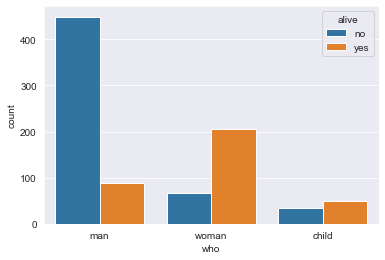

In [9]:
#Let's see how the gender distribution looks like

sns.countplot(x='who',data=titanic, hue='alive')
display(pd.DataFrame(titanic[['who','alive']].value_counts()))
plt.show()

### What is the relationship for age and class?

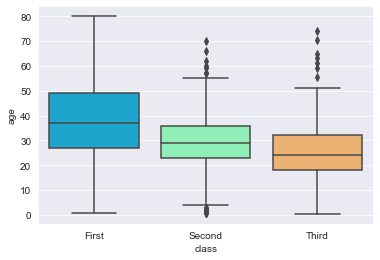

In [10]:
#Let's visualize age and class with a boxplot

sns.boxplot(x='class',y='age',data=titanic,palette='rainbow')
plt.show()

**We can observe that the first class is the class who had more senior individuals and we can observe that in lower classes individuals tend to be younger**

### Demographics based on town embarked from?

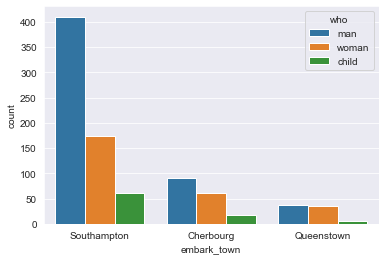

In [11]:
sns.countplot(x='embark_town',data=titanic, hue=('who'))
plt.show()

**Most of the people embarked from Southhampton,especially men. Possibily indicating that ship workers boarded in Southhampton**

## Advertising Use Case

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They need your exptertise to help them figure it out! Let's get started!

- **Avg. Session Length:** Average session of in-store style advice sessions.
- **Time on App:** Average time spent on App in minutes
- **Time on Website:** Average time spent on Website in minutes
- **Length of Membership:** How many years the customer has been a member

In [12]:
customers=pd.read_csv('https://raw.githubusercontent.com/araj2/customer-database/master/Ecommerce%20Customers.csv')

In [13]:
#Let's see the description of this dataset
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### What is the most correlated feature?

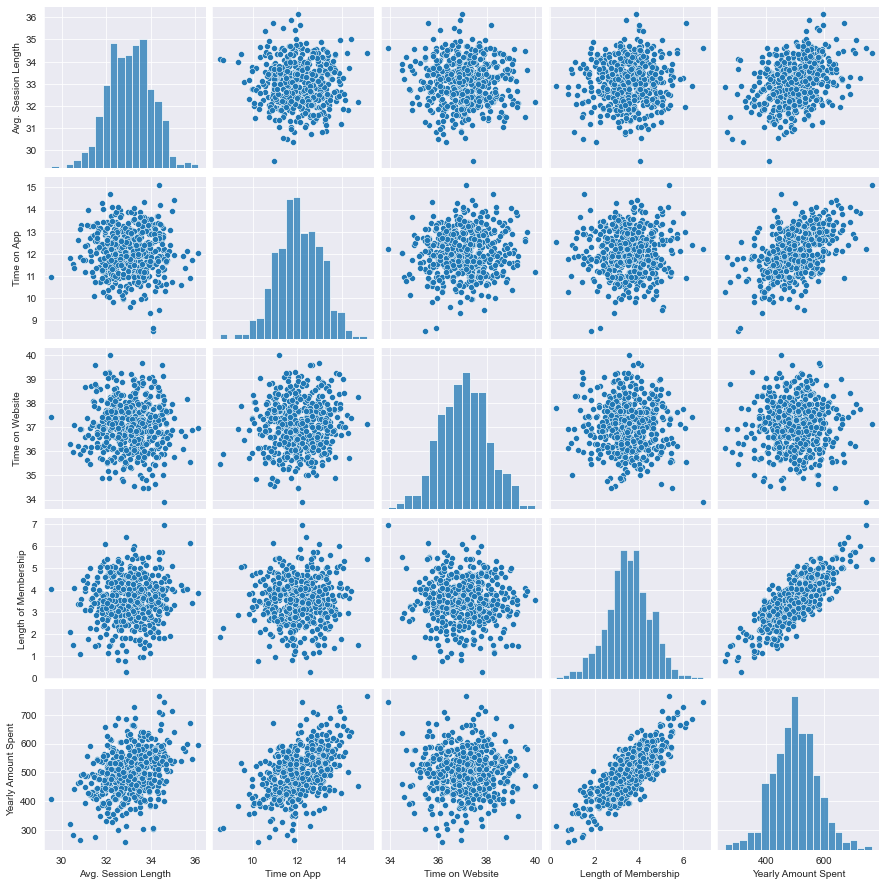

In [14]:
#let's look at the relationships of features accross the dataset.
sns.pairplot(data=customers)
plt.show()

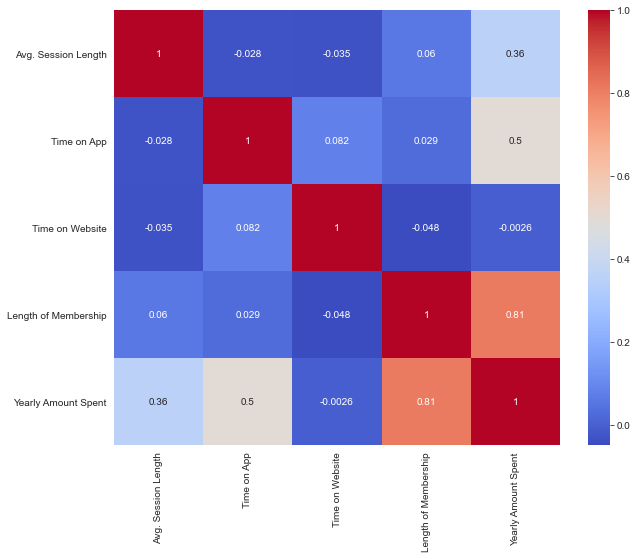

In [15]:
#Let's make it bigger with matplotlib help
plt.figure(figsize=(10,8))
#Another way to visualize the correlation of this dataset

#Let's set another style
sns.set_style('whitegrid')
#let's get correlation with pandas
correlation=customers.corr()

#let's visualize this correlation

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

**<div class="mark">
We can confirm that the Length of the Membership and Yearly Amount Spent are the most correlated features (positively) wih correlation coeficcient of 0.81</div><i class="fa fa-lightbulb-o "></i>**

### So, where should the efforts based on the understanding of the features relationship?

**Let's use a linear regression analysis to understand how the company should allocate its efforts to improve the Yearly Amount Spent**

In [16]:
# Let's separate the attribute we would like to predict (dependent variable)
y = customers['Yearly Amount Spent']

# Let's put the other attributes (independent variable)
X = customers[['Avg. Session Length', 'Time on App',
               'Time on Website', 'Length of Membership']]

In [17]:
#Let's import Scikit-learn (our python library for the linear regression )
from sklearn.model_selection import train_test_split

In [18]:
#Let's now fit the data into the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
#Let's train the model
from sklearn.linear_model import LinearRegression

In [20]:
#Let's create the instance
lm=LinearRegression()

In [21]:
#Let's fit the data
lm.fit(X_train,y_train)
plt.show()

### Let's look at the predicted values and test values in a scatter plot

In [22]:
#Predicting the data
predictions = lm.predict( X_test)

In [23]:
predictionsdf=pd.DataFrame({'y_test':y_test,'predictions':predictions})

predictionsdf.head()

,y_test,predictions
18,452.315675,456.441861
361,401.033135,402.720053
104,410.069611,409.253154
4,599.406092,591.431034
156,586.155870,590.014373


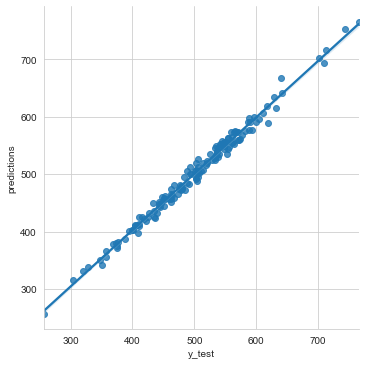

In [24]:
sns.lmplot(x='y_test',y='predictions',data=predictionsdf)
plt.show()

### Let's undertstand and visualize the residuals to evaluate the linear regression model

In [25]:
# Let;s look at the residuals of the model
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))


residualsdf = pd.DataFrame({'Mean Absolute Error': MAE,
                           'Mean Square Error': MSE,
                            'Root Mean Square Error': RMSE}, index=[1])


residualsdf.head()

,Mean Absolute Error,Mean Square Error,Root Mean Square Error
1,7.228149,79.813052,8.933815


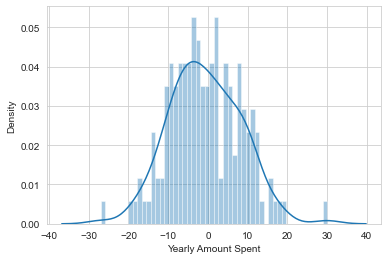

In [26]:
#Let's look at the residuals
sns.distplot((y_test-predictions),bins=50);

### Let's undertsand the coefficients

In [27]:
# Let's look at the coeficcients
# Let's look at the coeficcients
coef = pd.DataFrame({'Features': ['Avg. Session Length', 'Time on App',
                    'Time on Website', 'Length of Membership'], 'Coefficient Values': lm.coef_})
coef

,Features,Coefficient Values
0,Avg. Session Length,25.981550
1,Time on App,38.590159
2,Time on Website,0.190405
3,Length of Membership,61.279097


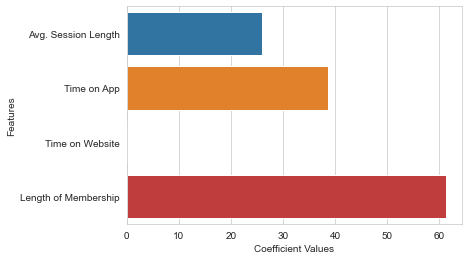

In [28]:
#Let's graph the coefficient values with a barplot
sns.barplot(data=coef, y='Features', x='Coefficient Values',)
plt.show()

**<span class="mark">Interpreting the coefficients:</span>**

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of <span class="mark">25.98</span> total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of <span class="mark">38.59</span> total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of <span class="mark">0.19</span> total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of <span class="mark">61.27</span> total dollars spent**.


# **Code Folding Example**

In [29]:
class DataPipeline:

    def __init__(self, input_path, output_path):
        self.input_path = input_path
        self.output_path = output_path

    def read_data(self):
        # Read data from input_path
        data = pd.read_csv(self.input_path)
        return data

    def preprocess_data(self, data):
        # Perform data preprocessing
        data = data.dropna()
        data = data.drop_duplicates()
        data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
        return data

    def analyze_data(self, data):
        # Analyze the data
        total_sales = data['sales'].sum()
        avg_sales_per_day = data.groupby('date')['sales'].mean()
        return total_sales, avg_sales_per_day

    def write_data(self, data):
        # Write data to output_path
        data.to_csv(self.output_path, index=False)

    def run_pipeline(self):
        # Execute the pipeline
        data = self.read_data()
        data = self.preprocess_data(data)
        total_sales, avg_sales_per_day = self.analyze_data(data)
        self.write_data(data)
        return total_sales, avg_sales_per_day